This notebook checks how the household subsampling for anthropometric measures are designed.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI'

# khm dhs05

### read in data

#### processed microdata pre (de jure and) subsample dropping

In [2]:
YY = '05'
survey = f'khm_dhs{YY}_cot'

In [3]:
df = pd.read_stata(
        datafd_path / survey / f'KHM{YY}_merged.dta'
) 

In [4]:
df

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,low_bmiage_b,low_bmiage_b_u,child_PR,weight_ch,underweight,underweight_u,stunting,stunting_u,wasting,wasting_u
0,1 1,1,KH5,1,1,2,1,414342,11,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 1,2,KH5,1,1,2,1,414342,11,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 1,3,KH5,1,1,2,1,414342,11,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 1,4,KH5,1,1,2,1,414342,11,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 1,5,KH5,1,1,2,1,414342,11,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73005,557 27,3,KH5,557,27,2,557,783186,1,2006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73006,557 27,4,KH5,557,27,2,557,783186,1,2006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73007,557 28,1,KH5,557,28,2,557,783186,1,2006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73008,557 28,2,KH5,557,28,2,557,783186,1,2006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.hv042.value_counts()  # household selected for anthropometric measures

not selected    36990
selected        36020
Name: hv042, dtype: int64

In [6]:
df['subsample'] = (df.hv042 == 'selected').astype(int)

C:\Users\tianc\AppData\Local\Temp\ipykernel_21336\2365061199.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['subsample'] = (df.hv042 == 'selected').astype(int)


In [7]:
df.subsample.value_counts()

0    36990
1    36020
Name: subsample, dtype: int64

In [8]:
df.hh_id.nunique()

14243

In [9]:
df.hv001.nunique()  # cluster number

557

In [10]:
# All household members share the same subsample status - selected or not
n_uniq_per_hh = df.groupby('hh_id')['subsample'].nunique()
assert all(n_uniq_per_hh == 1)

In [11]:
df_hh = df.groupby(['hv001', 'hh_id'])['subsample'].first().reset_index()
df_hh

,hv001,hh_id,subsample
0,1,10001.0,1
1,1,10003.0,0
2,1,10004.0,0
3,1,10006.0,1
4,1,10007.0,1
...,...,...,...
14238,557,5570024.0,1
14239,557,5570025.0,0
14240,557,5570026.0,0
14241,557,5570027.0,0


In [12]:
perc_hh_subsampled = df_hh.groupby('hv001')['subsample'].mean()

In [13]:
perc_hh_subsampled.sort_values()

hv001
348    0.380952
75     0.416667
199    0.421053
323    0.421053
41     0.428571
         ...   
182    0.571429
534    0.571429
516    0.571429
4      0.590909
512    0.600000
Name: subsample, Length: 557, dtype: float64

<AxesSubplot:>

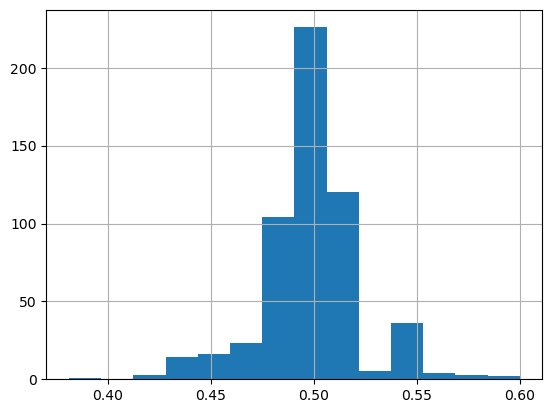

In [14]:
perc_hh_subsampled.hist(bins=14)

In [15]:
expected_perc = 0.5
allowed_err = 0.05

In [16]:
np.mean(
    (perc_hh_subsampled > (expected_perc - allowed_err)) & (perc_hh_subsampled < (expected_perc + allowed_err))
)

0.9497307001795332

# khm dhs10

### read in data

#### processed microdata pre (de jure and) subsample dropping

In [17]:
YY = '10'
survey = f'khm_dhs{YY}_cot'

In [18]:
df = pd.read_stata(
        datafd_path / survey / f'KHM{YY}_merged.dta'
) 

In [19]:
df

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,age_month_b,low_bmiage_b,low_bmiage_b_u,weight_ch,underweight,underweight_u,stunting,stunting_u,wasting,wasting_u
0,1 1,1,KH5,1,1,4,1,417320,8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 1,2,KH5,1,1,4,1,417320,8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 1,3,KH5,1,1,4,1,417320,8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 1,4,KH5,1,1,4,1,417320,8,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 1,5,KH5,1,1,4,1,417320,8,2010,...,NaN,NaN,NaN,0.41732,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76915,611 45,2,KH5,611,45,2,611,1503820,11,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76916,611 45,3,KH5,611,45,2,611,1503820,11,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76917,611 45,4,KH5,611,45,2,611,1503820,11,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76918,611 45,5,KH5,611,45,2,611,1503820,11,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.hv042.value_counts()  # household selected for anthropometric measures

not selected    38663
selected        38257
Name: hv042, dtype: int64

In [21]:
df['subsample'] = (df.hv042 == 'selected').astype(int)

C:\Users\tianc\AppData\Local\Temp\ipykernel_21336\2365061199.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['subsample'] = (df.hv042 == 'selected').astype(int)


In [22]:
df.subsample.value_counts()

0    38663
1    38257
Name: subsample, dtype: int64

In [23]:
df.hh_id.nunique()

15667

In [24]:
df.hv001.nunique()  # cluster number

611

In [25]:
# All household members share the same subsample status - selected or not
n_uniq_per_hh = df.groupby('hh_id')['subsample'].nunique()
assert all(n_uniq_per_hh == 1)

In [26]:
df_hh = df.groupby(['hv001', 'hh_id'])['subsample'].first().reset_index()
df_hh

,hv001,hh_id,subsample
0,1,10001.0,1
1,1,10002.0,0
2,1,10003.0,1
3,1,10004.0,0
4,1,10005.0,1
...,...,...,...
15662,611,6110038.0,0
15663,611,6110040.0,1
15664,611,6110041.0,0
15665,611,6110043.0,1


In [27]:
perc_hh_subsampled = df_hh.groupby('hv001')['subsample'].mean()

In [28]:
perc_hh_subsampled.sort_values()

hv001
310    0.428571
68     0.440000
351    0.440000
585    0.440000
604    0.440000
         ...   
247    0.560000
395    0.565217
71     0.571429
601    0.578947
454    0.600000
Name: subsample, Length: 611, dtype: float64

<AxesSubplot:>

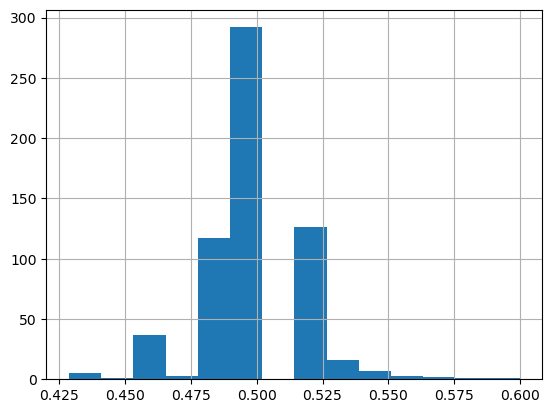

In [29]:
perc_hh_subsampled.hist(bins=14)

In [30]:
expected_perc = 0.5
allowed_err = 0.05

In [31]:
np.mean(
    (perc_hh_subsampled > (expected_perc - allowed_err)) & (perc_hh_subsampled < (expected_perc + allowed_err))
)

0.9754500818330606

# khm dhs14

### read in data

#### processed microdata pre (de jure and) subsample dropping

In [32]:
YY = '14'
survey = f'khm_dhs{YY}_cot'

In [33]:
df = pd.read_stata(
        datafd_path / survey / f'KHM{YY}_merged.dta'
) 

In [34]:
df

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,low_bmiage_b,low_bmiage_b_u,child_PR,weight_ch,underweight,underweight_u,stunting,stunting_u,wasting,wasting_u
0,1 1,1,KH6,1,1,1,1,1303385,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 1,2,KH6,1,1,1,1,1303385,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 1,3,KH6,1,1,1,1,1303385,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 1,4,KH6,1,1,1,1,1303385,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 2,1,KH6,1,2,1,1,1303385,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74117,61128,1,KH6,611,28,1,611,600033,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74118,61128,2,KH6,611,28,1,611,600033,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74119,61128,3,KH6,611,28,1,611,600033,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74120,61128,4,KH6,611,28,1,611,600033,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.hv042.value_counts()  # household selected for anthropometric measures

selected        48427
not selected    25695
Name: hv042, dtype: int64

In [36]:
df['subsample'] = (df.hv042 == 'selected').astype(int)

In [37]:
df.subsample.value_counts()

1    48427
0    25695
Name: subsample, dtype: int64

In [38]:
df.hh_id.nunique()

15825

In [39]:
df.hv001.nunique()  # cluster number

611

In [40]:
# All household members share the same subsample status - selected or not
n_uniq_per_hh = df.groupby('hh_id')['subsample'].nunique()
assert all(n_uniq_per_hh == 1)

In [41]:
df_hh = df.groupby(['hv001', 'hh_id'])['subsample'].first().reset_index()
df_hh

,hv001,hh_id,subsample
0,1,10001.0,0
1,1,10002.0,1
2,1,10003.0,1
3,1,10004.0,0
4,1,10005.0,1
...,...,...,...
15820,611,6110024.0,1
15821,611,6110025.0,0
15822,611,6110026.0,1
15823,611,6110027.0,1


In [42]:
perc_hh_subsampled = df_hh.groupby('hv001')['subsample'].mean()

In [43]:
perc_hh_subsampled.sort_values()

hv001
59     0.590909
14     0.590909
224    0.600000
450    0.600000
277    0.600000
         ...   
290    0.727273
30     0.727273
461    0.727273
237    0.736842
28     0.750000
Name: subsample, Length: 611, dtype: float64

<AxesSubplot:>

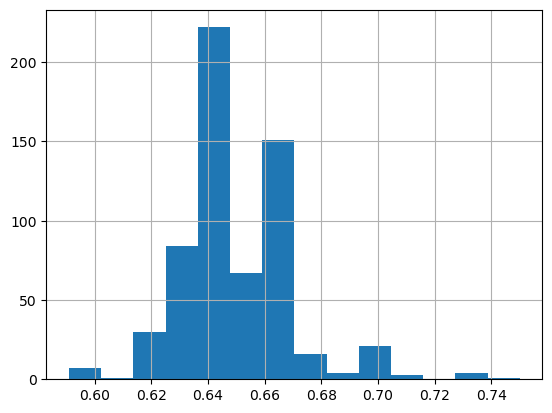

In [44]:
perc_hh_subsampled.hist(bins=14)

In [45]:
expected_perc = 2/3
allowed_err = 0.05

In [46]:
np.mean(
    (perc_hh_subsampled > (expected_perc - allowed_err)) & (perc_hh_subsampled < (expected_perc + allowed_err))
)

0.9296235679214403

# khm dhs00

### read in data

#### processed microdata pre (de jure and) subsample dropping

In [47]:
YY = '00'
survey = f'khm_dhs{YY}_test'

In [48]:
df = pd.read_stata(
        datafd_path / survey / f'KHM{YY}_merged.dta'
) 

In [49]:
df

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,low_bmiage_b,low_bmiage_b_u,child_PR,weight_ch,underweight,underweight_u,stunting,stunting_u,wasting,wasting_u
0,1 1,1,KH4,1,1,2,1,858099,6,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 1,2,KH4,1,1,2,1,858099,6,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 1,3,KH4,1,1,2,1,858099,6,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 1,4,KH4,1,1,2,1,858099,6,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 1,5,KH4,1,1,2,1,858099,6,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66280,471 43,5,KH4,471,43,2,471,820535,3,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66281,471 43,6,KH4,471,43,2,471,820535,3,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66282,471 44,1,KH4,471,44,3,471,820535,3,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66283,471 44,2,KH4,471,44,3,471,820535,3,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.shanthro.value_counts()  # household selected for anthropometric measures

no     33677
yes    32608
Name: shanthro, dtype: int64

In [51]:
df['subsample'] = (df.shanthro == 'yes').astype(int)

C:\Users\tianc\AppData\Local\Temp\ipykernel_21336\3779154521.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['subsample'] = (df.shanthro == 'yes').astype(int)


In [52]:
df.subsample.value_counts()

0    33677
1    32608
Name: subsample, dtype: int64

In [53]:
df.hh_id.nunique()

12236

In [54]:
df.hv001.nunique()  # cluster number

471

In [55]:
# All household members share the same subsample status - selected or not
n_uniq_per_hh = df.groupby('hh_id')['subsample'].nunique()
assert all(n_uniq_per_hh == 1)

In [56]:
df_hh = df.groupby(['hv001', 'hh_id'])['subsample'].first().reset_index()
df_hh

,hv001,hh_id,subsample
0,1,10001.0,0
1,1,10004.0,1
2,1,10006.0,0
3,1,10008.0,1
4,1,10011.0,0
...,...,...,...
12231,471,4710038.0,1
12232,471,4710039.0,0
12233,471,4710041.0,1
12234,471,4710043.0,0


In [57]:
perc_hh_subsampled = df_hh.groupby('hv001')['subsample'].mean()

In [58]:
perc_hh_subsampled.sort_values()

hv001
269    0.296296
45     0.321429
177    0.352941
140    0.357143
181    0.366667
         ...   
250    0.583333
379    0.588235
442    0.600000
59     0.631579
284    0.866667
Name: subsample, Length: 471, dtype: float64

<AxesSubplot:>

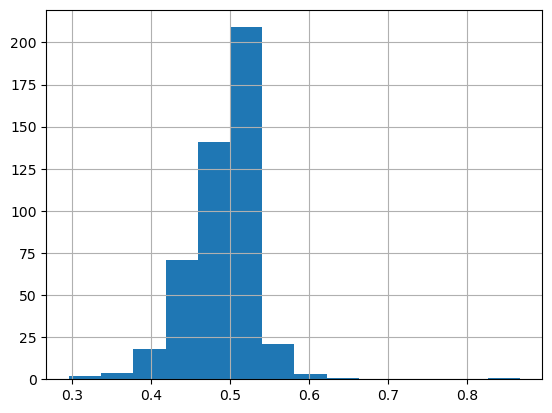

In [59]:
perc_hh_subsampled.hist(bins=14)

In [60]:
expected_perc = 0.5
allowed_err = 0.05

In [61]:
np.mean(
    (perc_hh_subsampled > (expected_perc - allowed_err)) & (perc_hh_subsampled < (expected_perc + allowed_err))
)

0.7919320594479831

# The end

In [62]:
df_nowall_lst = []
for i in range(1, n_spatial_unit+1):
    df = pd.read_stata(
        datafd_path / survey / f'{"_".join(survey.split("_")[:2])}_mpi_{spatial_res}{i}.dta'
    ) 
    assert df.psu.unique().squeeze() == i
    df_nowall_lst.append(df)

NameError: name 'n_spatial_unit' is not defined

### explore and preprocess data

#### compile dataframes in the lists